In [1]:
import numpy as np
import pandas as pd # 판다스 임포트

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 경로
train = pd.read_csv('/content/train.csv') # 훈련 데이터
test = pd.read_csv('/content/test.csv')   # 테스트 데이터
submission = pd.read_csv('/content/sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
print(pd.__version__)

1.5.3


In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


datetime - 대여날짜 - 1시간 간격(분, 초가 의미가 없음)

season - 1: 봄, 2: 여름 3: 가을 4: 겨울

hoilday - 공휴일 여부(0 : 비공휴일 1: 공휴일)

workingday - 근무일 여부(0 : 근무일 아님, 1 : 근무일) - 주말과 공휴일이 아니면 근무일

weather 1: 맑음 2: 약간 흐림 3: 약간의 눈/약간의 비/천둥 번개/흐림 4: 악천후(숫자가 클수록 날씨가 안좋음)

temp : 실제온도

atemp : 체감온도

humidity : 상대습도

windspeed : 풍속

casual : 등록되지 않은 사용자 수 - sub target

registered : 등록된 사용자(회원)수 - sub target

count : 자전거 대여 수량 - main target

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
# Convert the 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

# Create new columns for year, month, day, hour, minute, and second
# 분/초는 모두 0이므로 제외
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [9]:
# Convert the 'datetime' column to datetime format
test['datetime'] = pd.to_datetime(test['datetime'])

# Create new columns for year, month, day, hour, minute, and second
# 분/초는 모두 0이므로 제외
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [10]:
import calendar
from datetime import datetime

# Create a new 'date' column that combines 'year', 'month', and 'day'
train['date'] = pd.to_datetime(train[['year', 'month', 'day']])

# Create a new 'weekday' column
train['weekday'] = train['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
train = train.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [11]:
import calendar

# Create a new 'date' column that combines 'year', 'month', and 'day'
test['date'] = pd.to_datetime(test[['year', 'month', 'day']])

# Create a new 'weekday' column
test['weekday'] = test['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
test = test.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


In [12]:
#datetime으로부터 요일 추출하기 (dayofweek 활용)
train['weekday_'] = train['datetime'].dt.dayofweek
test['weekday_'] = test['datetime'].dt.dayofweek

In [13]:
# Drop the 'datetime' column
train = train.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,weekday_
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday,5


In [14]:
# Drop the 'datetime' column
test = test.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday,weekday_
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday,3


In [15]:
print('Casual의 비율: ', round((train['casual'].sum() / train['count'].sum())*100, 2))
print('Registered의 비율: ', round((train['registered'].sum() / train['count'].sum())*100, 2))

Casual의 비율:  18.8
Registered의 비율:  81.2


In [16]:
c_c = train.corr()['casual']['count']
r_c = train.corr()['registered']['count']
print(round(c_c / (c_c + r_c) * 100, 2), ':', round(r_c / (c_c + r_c) * 100, 2))

41.56 : 58.44


<ipython-input-16-b66167f73acf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_c = train.corr()['casual']['count']
<ipython-input-16-b66167f73acf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r_c = train.corr()['registered']['count']


In [17]:
train[train['atemp']>=31]['month'].value_counts()

7     796
8     714
6     547
9     372
5     181
10    108
4      96
3      61
2      12
11      9
12      4
Name: month, dtype: int64

## 차원 축소

In [18]:
from sklearn.decomposition import PCA
from scipy.stats import norm

In [19]:
pca=PCA(n_components=1)
pca.fit(train[['temp', 'atemp']])
pca.explained_variance_ratio_
# vif가 10이상이면 다중공선성이 존재 -> atemp와 temp에 다중공선성 문제가 보임
# 주성분 분석으로 차원을 줄여보기로 함

array([0.99252735])

In [20]:
train['new_temp'] = pca.fit_transform(train[['temp','atemp']])
test['new_temp'] = pca.fit_transform(test[['temp','atemp']])
# sns.distplot(train['new_temp'], fit=norm)

<Axes: >

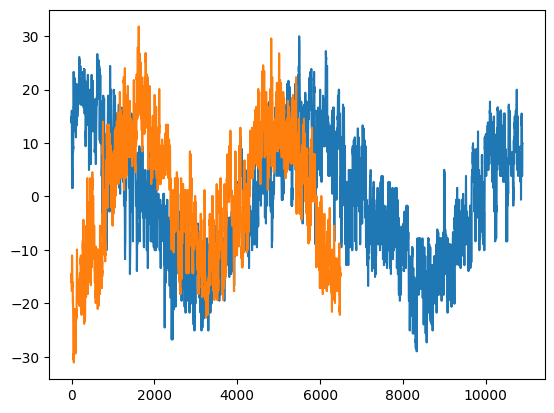

In [21]:
train['new_temp'].plot()
test['new_temp'].plot()

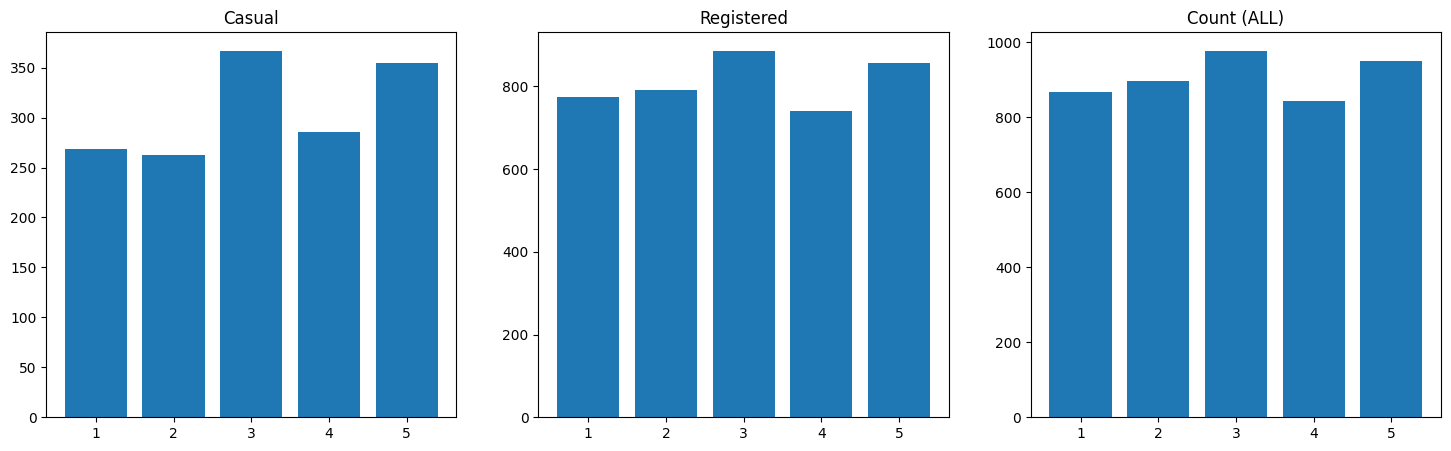

In [22]:
# 체감온도 위험 지수
# 위험 - 37도 이상
# 매우높음 - 34도 이상 37도 미만
# 높음 - 31도 이상 34도 미만
# 보통 - 29도 이상 31도 미만
# 낮음 - 29도 미만

# 'atemp' 열에 대한 점수로 변환하는 함수
def convert_to_scores(value):
    if value >= 37 :
        return 1
    elif value >= 34 :
        return 2
    elif value >= 31 :
        return 3
    elif value >= 29 :
        return 4
    else:
        return 5

# 'atemp' 열 값 변환
atemp_Extr = train['atemp']
atemp_Exte = test['atemp']
atemp_Extr = atemp_Extr.apply(convert_to_scores)
atemp_Exte = atemp_Exte.apply(convert_to_scores)

# 'New_var1' 열에 저장
train['New_var1'] = atemp_Extr
test['New_var1'] = atemp_Exte

train['New_var1'].value_counts()
test['New_var1'].value_counts()

# fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# ax1, ax2, ax3 = axs.flatten()

# # y축은 "평균" 대여량
# ax1.bar(x='New_var1', height='casual', data=train)
# ax2.bar(x='New_var1', height='registered', data=train)
# ax3.bar(x='New_var1', height='count', data=train)

# ax1.set_title('Casual')
# ax2.set_title('Registered')
# ax3.set_title('Count (ALL)')

# plt.show()

<Axes: >

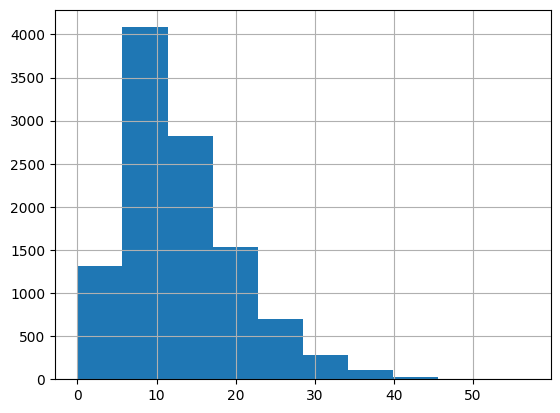

In [23]:
train['windspeed'].hist()

# 데이터 시각화

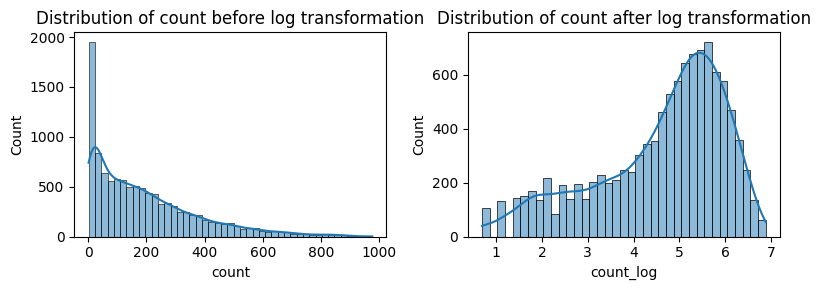

In [24]:
# Plot the distribution of 'count' before the transformation
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(train['count'], kde=True)
plt.title('Distribution of count before log transformation')

# Apply the log transformation
train['count_log'] = np.log1p(train['count'])

# Plot the distribution of 'count' after the transformation
plt.subplot(1, 2, 2)
sns.histplot(train['count_log'], kde=True)
plt.title('Distribution of count after log transformation')

plt.tight_layout()
plt.show()

In [25]:
# # Plot the distribution of all numeric columns
# num_vars = train.select_dtypes(include=[np.number]).columns.tolist()

# n = len(num_vars)
# ncols = 3
# nrows = n // ncols + (n % ncols != 0)

# fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

# for var, ax in zip(num_vars, axes.ravel()):
#     sns.histplot(train[var], kde=True, ax=ax)
#     ax.set_title(f'Distribution of {var}')

# plt.tight_layout()
# plt.show()

In [26]:
# #Figure 준비
# figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
# plt.tight_layout()
# figure.set_size_inches(10, 10)

# # 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
# sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
# sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
# sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
# sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# #서브플롯에 제목 달기
# axes[0, 0].set(title='Season')
# axes[0, 1].set(title='Weather')
# axes[1, 0].set(title='Holiday')
# axes[1, 1].set(title='Working Day')

In [27]:
# figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# # Create point plots for 'workingday', 'holiday', 'weekday', 'season', 'weather'
# sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0, 0])
# sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[0, 1])
# sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[0, 2])
# sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[1, 0])
# sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[1, 1])

# # Set the titles for the subplots
# axes[0, 0].set_title('Hourly count by working day')
# axes[0, 1].set_title('Hourly count by holiday')
# axes[0, 2].set_title('Hourly count by weekday')
# axes[1, 0].set_title('Hourly count by season')
# axes[1, 1].set_title('Hourly count by weather')

# # Remove the empty subplot
# figure.delaxes(axes[1, 2])

# plt.tight_layout()
# plt.show()

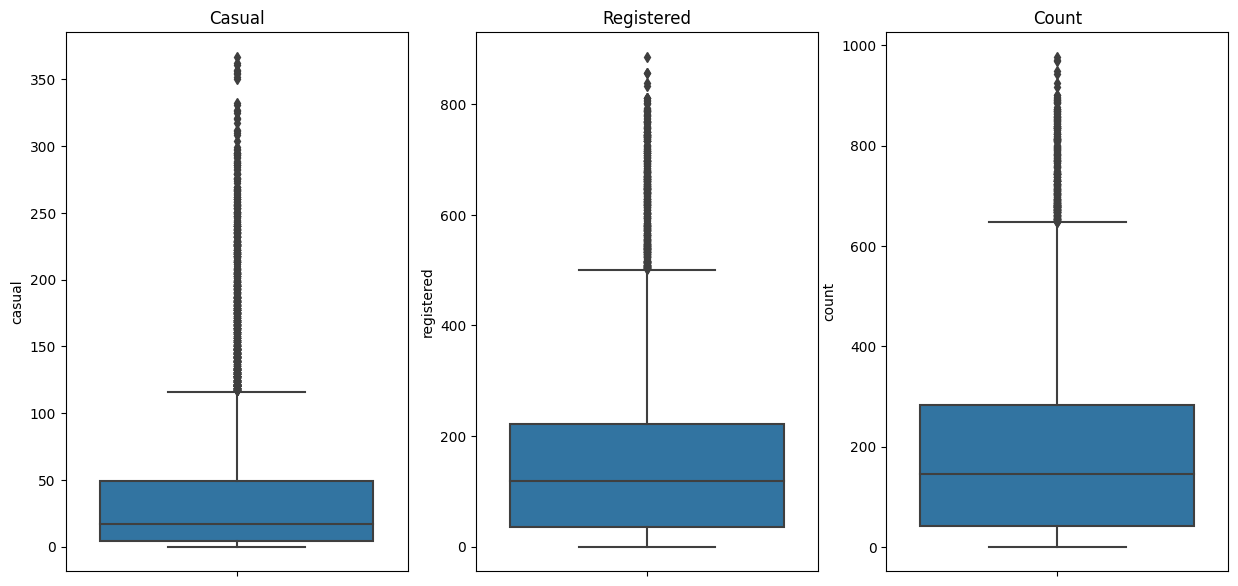

In [28]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7))

sns.boxplot(y = 'casual', data = train, ax = ax1)
sns.boxplot(y = 'registered', data = train, ax = ax2)
sns.boxplot(y = 'count', data = train, ax = ax3)

ax1.set_title('Casual')
ax2.set_title('Registered')
ax3.set_title('Count')

plt.show()

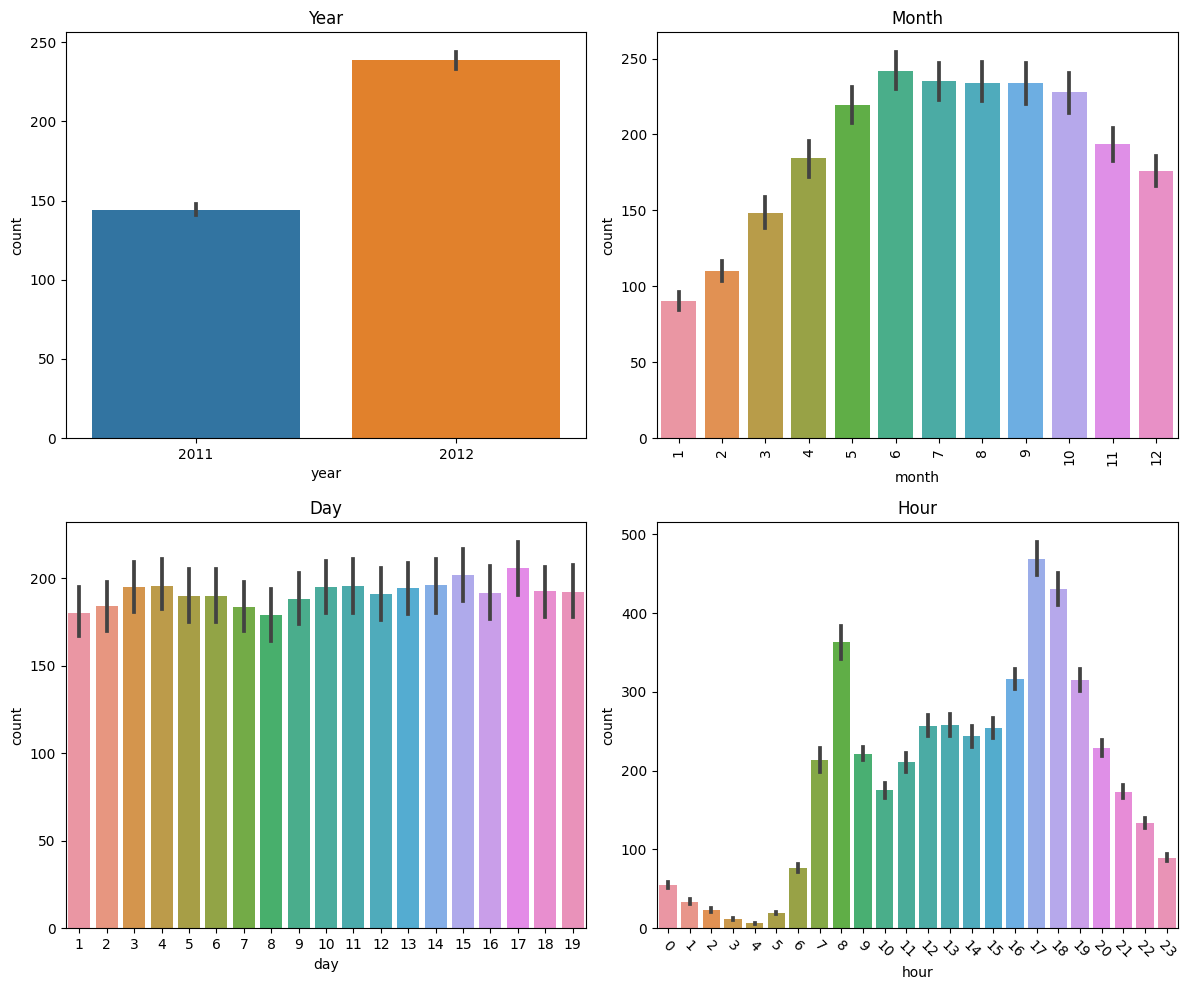

In [29]:
fig, axs = plt.subplots(2,2, figsize=(12, 10))
ax1, ax2, ax3, ax4 = axs.flatten()

# y축은 평균 대여량
axs1 = sns.barplot(x='year', y='count', data=train, ax = ax1)
axs2 = sns.barplot(x='month', y='count', data=train, ax = ax2)
axs3 = sns.barplot(x='day', y='count', data=train, ax = ax3)
axs4 = sns.barplot(x='hour', y='count', data=train, ax = ax4)

axs1.set_title('Year')
axs2.set_title('Month')
axs3.set_title('Day')
axs4.set_title('Hour')

# x축 라벨 회전
axs2.tick_params(axis = 'x', labelrotation = 90)
axs4.tick_params(axis = 'x', labelrotation = -45)

plt.tight_layout()
plt.show()

In [30]:
#주어진 데이터에서 날씨별로 데이터가 얼마나 있나?
(train.groupby('weather')['count'].sum() / len(train))*100

weather
1    13559.277972
2     4658.827852
3      937.800845
4        1.506522
Name: count, dtype: float64

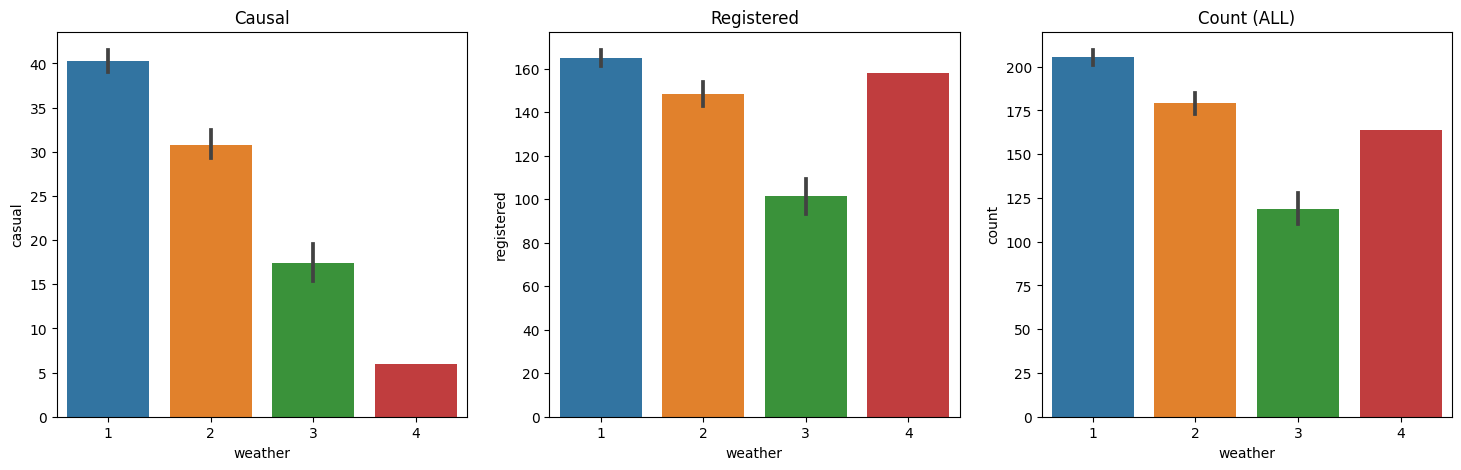

In [31]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()

# y축은 "평균" 대여량
axs1 = sns.barplot(x='weather', y='casual', data=train, ax = ax1)
axs2 = sns.barplot(x='weather', y='registered', data=train, ax = ax2)
axs3 = sns.barplot(x='weather', y='count', data=train, ax = ax3)

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

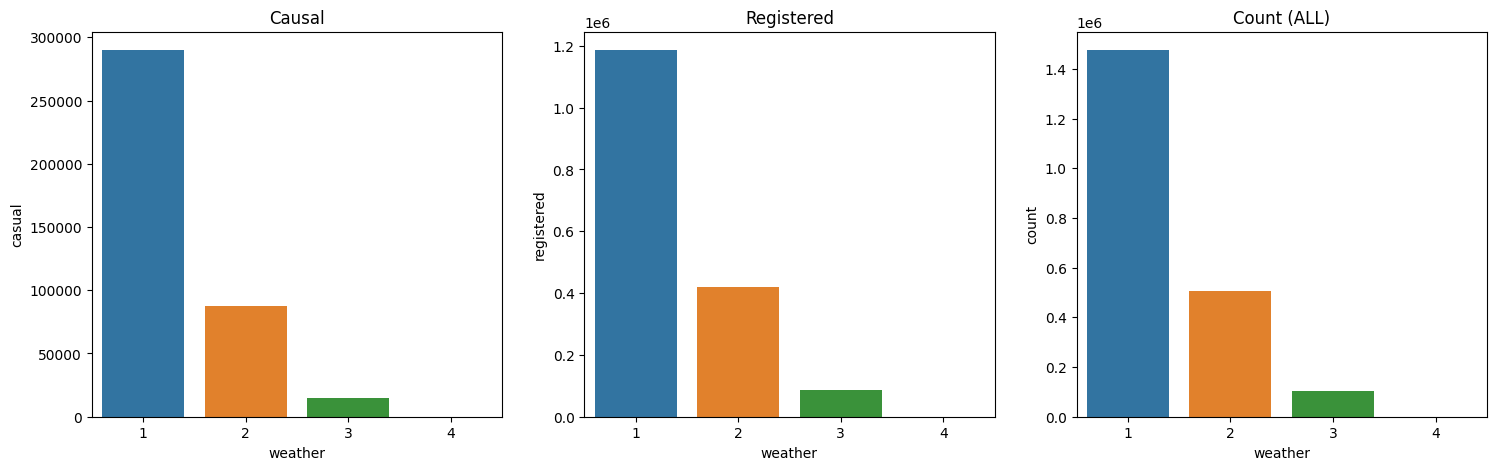

In [32]:
w_train = train.groupby('weather')[['count']].sum().reset_index()
wc_train = train.groupby('weather')[['casual']].sum().reset_index()
wr_train = train.groupby('weather')[['registered']].sum().reset_index()

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()

axs1 = sns.barplot(x='weather', y='casual', data=wc_train, ax = ax1)
axs2 = sns.barplot(x='weather', y='registered', data=wr_train, ax = ax2)
axs3 = sns.barplot(x='weather', y='count', data=w_train, ax = ax3)

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

In [85]:
train['weather'] = train['weather'].replace(to_replace='4', value='3')

test['weather'] = test['weather'].replace(to_replace='4', value='3')

In [86]:
test['weather'].value_counts()

1    4221
2    1710
3     560
3       2
Name: weather, dtype: int64

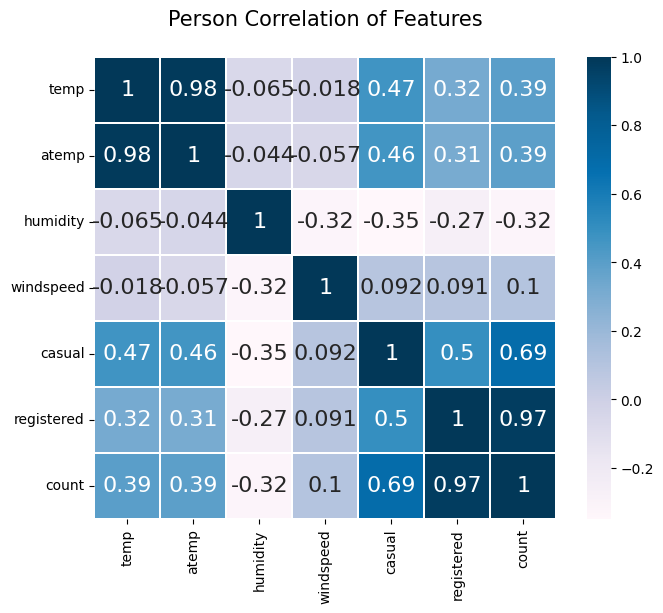

In [33]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 6))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train[['temp', 'atemp', 'humidity', 'windspeed',
                   'casual', 'registered', 'count']].corr(), linewidths = 0.1, vmax = 1.0 ,
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 16})
plt.show()

In [34]:
# 피처 간 상관관계 매트릭스
# corrMat = train.corr()
# fig, ax= plt.subplots()
# fig.set_size_inches(15, 15)
# sns.heatmap(corrMat, annot=True, cmap='RdYlGn') # 상관관계 히트맵 그리기
# ax.set(title='Heatmap of Numerical Data');

In [35]:
# Train 파생변수 관련 변수 제외
train.drop(['temp', 'atemp', 'day', 'month'], axis = 'columns', inplace=True)

# Test 파생변수 관련 변수 제외
test.drop(['temp', 'atemp', 'day', 'month'], axis = 'columns', inplace=True)

In [117]:
X_train = train[['season', 'holiday', 'workingday', 'weather', 'new_temp', #'atemp',
                'humidity', 'hour']]
y_train = train['count']

In [118]:
X_test = test[['season', 'holiday', 'workingday', 'weather', 'new_temp', #'atemp',
                'humidity', 'hour']] # 'windspeed',

In [46]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

선형회귀의 RMSLE 값

1차 : 1.0422 temp+atemp

2차 : 1.0434 temp

3차 : 1.0424 new_temp

4차 : 1.0423 atemp

1.0428 - weather 4 제거

In [125]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
log_y = np.log(y_train)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

coef = pd.Series(linear_reg_model.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending = False)
# sns.barplot(x=coef_sort.values, y=coef_sort.index)
preds = linear_reg_model.predict(X_train)
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0428


In [123]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=123)
log_y = np.log(y_train)
rf_model.fit(X_train, log_y)

preds = rf_model.predict(X_train)
print(f'Random Forest의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

rf_preds = rf_model.predict(X_test)

submission['count'] = np.exp(rf_preds)
submission.to_csv('submission_random_forest.csv', index=False)

Random Forest의 RMSLE 값: 0.1697


In [126]:
# Lasso 모델
from sklearn.linear_model import Lasso

lasso_reg_model = Lasso(random_state=123)
log_y = np.log(y_train)  # 로그로
lasso_reg_model.fit(X_train, log_y)

preds = lasso_reg_model.predict(X_train)

lasso_preds = lasso_reg_model.predict(X_test) #테스트

submission['count'] = np.exp(lasso_preds)  # 지수변환
print(f'라쏘 회귀의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')
# submission.to_csv('lasso.csv', index=False)

라쏘 회귀의 RMSLE 값: 1.0662


In [127]:
# GBoost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

gboost_model = GradientBoostingRegressor(random_state=123)
gboost_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = gboost_model.predict(X_train)
print(f'GBoost의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
# result.to_csv('GBoost.csv', index=False)

GBoost의 RMSLE 값: 0.4266


In [131]:
# XGB
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(random_state=123)
xgboost_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = xgboost_model.predict(X_train)
print(f'XGBoost의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
# result.to_csv('predictions_xgboost.csv', index=False)

ValueError: ignored

In [129]:
# ElasticNet
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(random_state=123)
elasticnet_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = elasticnet_model.predict(X_train)
print(f'ElasticNet의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
result.to_csv('predictions_elasticnet.csv', index=False)

ElasticNet의 RMSLE 값: 1.0601


In [130]:
# SVR
from sklearn.svm import SVR

svm_model = SVR(random_state=123)
svm_model.fit(X_train, log_y)

preds = svm_model.predict(X_train)
print(f'SVM의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

svm_preds = svm_model.predict(X_test)

submission['count'] = np.exp(svm_preds)
submission.to_csv('submission_svm.csv', index=False)

TypeError: ignored

In [43]:
# linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

# submission['count'] = np.exp(linearreg_preds)    # 지수변환
# submission.to_csv('submission.csv', index=False) # 파일로 저장

---

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

In [89]:
X_c = train.drop(['casual'], axis = 1)
y_c = train['casual']

In [ ]:
X_r = train_re.drop(['registered'], axis = 1)
y_r = train_re['registered']